Data Evaluation


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Reads data
df = pd.read_csv("../Data/logbook_assignment1.csv")
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174870 entries, 0 to 1174869
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date_fueled      1125665 non-null  object
 1   date_captured    1174870 non-null  object
 2   odometer         1025716 non-null  object
 3   gallons          1100660 non-null  object
 4   cost_per_gallon  1094110 non-null  object
 5   total_spent      1100660 non-null  object
 6   mpg              1100660 non-null  object
 7   miles            146274 non-null   object
 8   user_url         1174870 non-null  object
dtypes: object(9)
memory usage: 80.7+ MB


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


All the columns are in string format, even the numeric ones. Theres missing values in most of the columns. Some of the cilumns formats are wrong, like data fuel. Some cols have text and numbers.

Question 1.1 - 1
Identify what percentage of date_fueled entries are not proper dates

In [54]:
Dates = pd.to_datetime(df['date_fueled'], errors='coerce')
Nat_values = Dates.isna() #counts no. of trues
Nat_count = Nat_values.sum()
Total_count = len(df)
percentage = (Nat_count/Total_count)*100
print(f"Invalid date_fueled entries: {percentage:.2f}%") 

Invalid date_fueled entries: 11.66%


The amount of dates that are not proper dates in date_fueled, is 11.66%. Meaning that 11.66% of the dates are Nat.
 

Question 1.1 - 2 If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy. 

In [55]:
df['date_captured'] = pd.to_datetime(df['date_captured'], errors = 'coerce')
intersection = df['date_fueled'].isna() & df['date_captured'].notna()
df.loc[intersection, 'date_fueled'] == df.loc[intersection, 'date_captured']
df['date_fueled'].head()

0    Cooling System, Heating System, Lights, Spark ...
1                                           Nov 7 2012
2                                          Sep 22 2012
3                                           May 4 2019
4                                          Feb 15 2022
Name: date_fueled, dtype: object

Converted date_captured to date format, then found all the rows where date_fueled had no values or NaT, while date_captured had a value, and changed it to date capture using df.loc

Question 1.1 - 3 Convert the column to a date format, setting any invalid date fueled entries
to NaT.


In [56]:
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors = 'coerce')
print(df['date_fueled'].head(10))

0          NaT
1   2012-11-07
2   2012-09-22
3   2019-05-04
4   2022-02-15
5   2021-10-23
6   2021-11-20
7   2022-01-20
8          NaT
9          NaT
Name: date_fueled, dtype: datetime64[ns]


The date_fueled column was converted to datetime format. Any entries that were not proper dates were set to NaT.

Question 1.1 - 4 Remove dates that are in the future, or dates that are earlier than 2005.

In [57]:
min = pd.Timestamp('2005-01-01')
max = pd.Timestamp.today()
print("before: ", len(df['date_fueled']))
df = df[(df['date_fueled']>=min) & (df['date_fueled']<=max)]
print("after: ", len(df['date_fueled']))

before:  1174870
after:  1037177


Question 1.1 - 5 Plot the distribution of fueling dates and comment on the results.

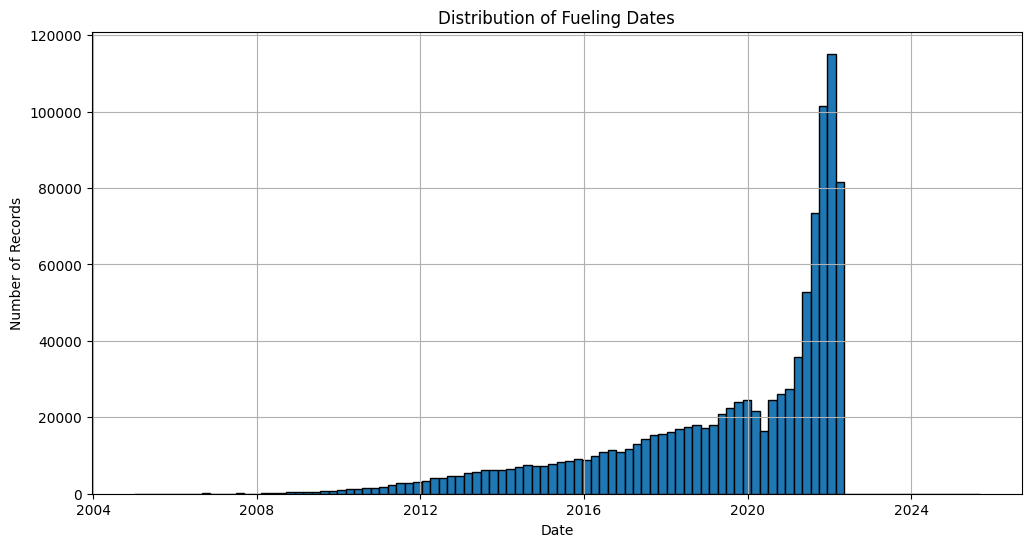

In [58]:
plt.figure(figsize=(12,6))
df['date_fueled'].hist(bins=100, edgecolor='black')

plt.title("Distribution of Fueling Dates")
plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.show()

The distribution of fueling dates shows that most records are concentrated in recent years (e.g., around 2020 onwards). Earlier dates have fewer records, likely because fewer users were logging their fuel data at that time. There are no obvious spikes beyond today's date, confirming that invalid future entries were successfully removed. Also we can see that most records of fuel were more recent from 2021 until 2022 - 2023.

1.2.1 

In [59]:
numeric_cols = ["gallons", "miles", "odometer", "mpg"]

missing_percentages = df[numeric_cols].isna().mean() * 100
print(missing_percentages)


gallons      3.323926
miles       88.581505
odometer    11.614893
mpg          3.323926
dtype: float64


The gallons column has only 3.32% missing entries, meaning most fueling events include fuel volume and the data is largely reliable. In contrast, the miles column is missing 88.58% of its values, which severely restricts direct mileage analysis and makes imputation from gallons and mpg essential. The odometer column has 11.61% missing entries, a noticeable but manageable gap that could impact long-term vehicle usage tracking. Finally, the mpg column shows 3.32% missing values, a relatively small amount that can often be calculated using the available gallons and miles data.

1.2.3

In [49]:
for col in numeric_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

1.2.2

In [50]:
df.loc[df["mpg"].isna() & df["miles"].notna() & df["gallons"].notna() & (df["gallons"] > 0), "mpg"] = \
    df["miles"] / df["gallons"]

df.loc[df["miles"].isna() & df["mpg"].notna() & df["gallons"].notna(), "miles"] = \
    df["mpg"] * df["gallons"]

df.loc[df["gallons"].isna() & df["miles"].notna() & df["mpg"].notna() & (df["mpg"] > 0), "gallons"] = \
    df["miles"] / df["mpg"]


1.2.4

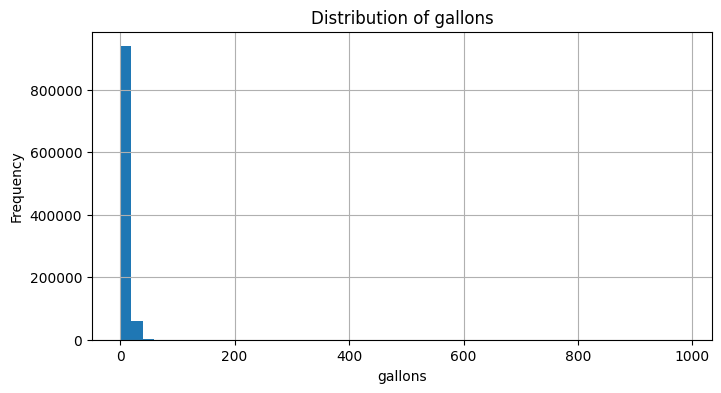

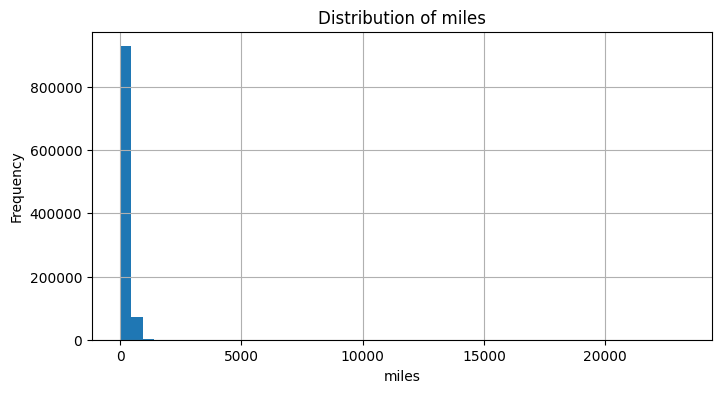

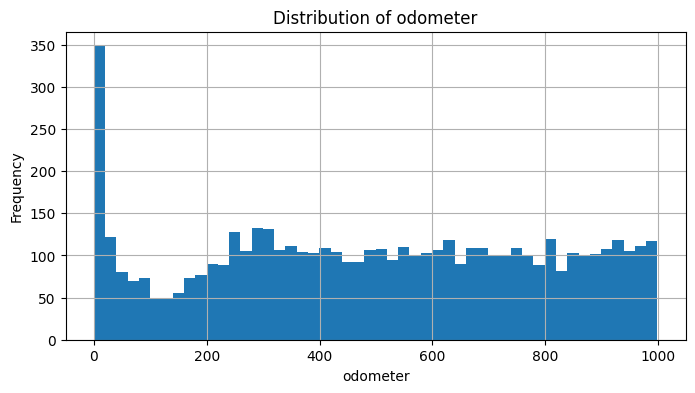

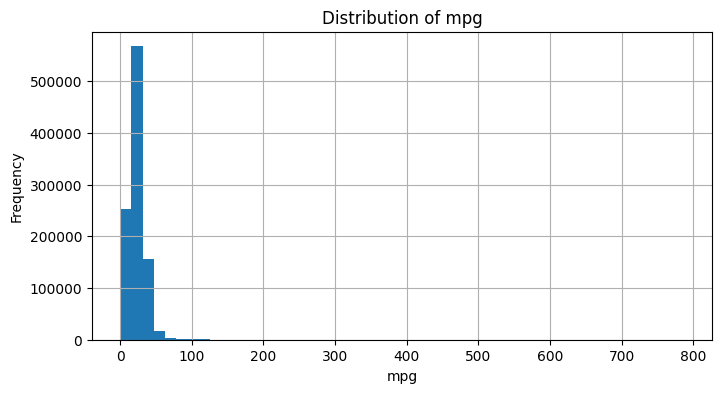

In [51]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    df[col].dropna().hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


The distribution plots for the numeric fields reveal significant data quality issues typical of user-generated datasets. The odometer readings show a relatively uniform distribution with a concerning spike at very low values, suggesting potential data entry errors or unit confusion. Both miles and gallons exhibit extremely right-skewed distributions with massive concentrations near zero and unrealistic outliers extending to 20,000+ miles and 1000+ gallons respectively, indicating mixed usage patterns (personal vs. commercial vehicles) and likely unit inconsistencies. The MPG distribution appears more reasonable with most values between 10-60 MPG and a realistic peak around 20-30 MPG, though some extreme outliers approaching 800 MPG reveal calculation errors from the problematic input data. Overall, these distributions highlight the critical need for robust outlier removal and data validation before conducting meaningful analysis, as the extreme values and skewed patterns suggest widespread data entry errors, unit confusion, and the mixing of different vehicle types in the dataset.

1.2.5

In [52]:
stats = df[numeric_cols].describe(include="all").T
stats["most_frequent"] = df[numeric_cols].mode().iloc[0]
print(stats)

              count        mean         std  min      25%       50%      75%  \
gallons   1002644.0   12.435565    6.618389  0.0    9.082   12.0090   14.966   
miles     1002641.0  265.943376  190.493068  0.0  184.700  268.4874  343.296   
odometer     5210.0  496.453359  296.886555  0.0  259.250  500.0000  750.000   
mpg       1002699.0   22.212579   15.585304  0.0   15.700   21.8000   28.500   

               max  most_frequent  
gallons     984.71         10.567  
miles     23238.40          0.000  
odometer    999.00          1.000  
mpg         786.50          0.000  


The gallons data shows an average of about 12.4 gallons per fueling, which is consistent with typical fuel tank sizes, though the maximum value of 984.71 appears unrealistic and likely reflects data entry errors. The miles column has a mean of 266 miles between fuelings, with most values clustering between 185 and 343 miles, but the maximum of 23,238 miles suggests some extreme outliers or incorrect entries. Odometer readings average around 496, with most values between 259 and 750, which seems unusually low for real-world odometer readings, possibly because the dataset only captured partial values or was truncated. The mpg values average 22.2, which is reasonable for vehicle fuel efficiency, but the maximum of 786.5 mpg is clearly an error. The most frequent values of 0 in miles and mpg further highlight missing or incorrectly recorded data, while the frequent gallon value around 10.6 aligns well with real-world refueling behavior.

Question 2.1 -1 Create a new column with the currency.


In [64]:
import re
def currency(x):
    if pd.isna(x):
        return None
    curr = str(x)

    if any(x in curr for x in ["Ch.f", "CHF", "C.hf", "C.h.f"]):
        return 'CHF'
    
    values = re.match(r"^([^0-9\.]+)",curr.strip())
    if values:
        return values.group(1).strip()
    return None

df['currency'] = df['cost_per_gallon'].apply(currency)
print(df['currency'].value_counts(dropna=False).head(10))

currency
$       684782
£        73164
€        53005
CA$      41015
None     40118
R        31623
AU$      19715
RM        7129
NZ$       6431
R$        5630
Name: count, dtype: int64


We extracted the currency from the cost columns by identifying the prefix symbol or abbreviation before the numeric values. A special case was accounted for with the Swiss Franc, which can appear as Ch.f. instead of CHF. This new column, currency, will be useful when comparing prices across countries.

Question 2.1 -2 Create a new column containing the float value of the total spend and the
cost per gallon.

In [65]:
def numerical_value(x):
    if pd.isna(x):
        return None
    curr = str(x)

    curr = re.sub(r"[^0-9\.\-]", "", curr)
    try:
        return float(curr)
    except:
        return None
    
df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(numerical_value)
df['total_spent_float'] = df['total_spent'].apply(numerical_value)

print(df[['cost_per_gallon', 'cost_per_gallon_float', 'total_spent', 'total_spent_float']].head())

  cost_per_gallon  cost_per_gallon_float total_spent  total_spent_float
1          $5.599                  5.599      $67.86              67.86
2           £5.45                  5.450      £43.53              43.53
3           £5.11                  5.110      £54.00              54.00
4          $3.029                  3.029      $35.29              35.29
5          $3.739                  3.739      $12.76              12.76


We created numeric versions of cost_per_gallon and total_spent by removing currency symbols and non-numeric characters, thenconverting the results to floats. This ensures these columns can be used in statistical analysis and numerical computations.

Question 2.1 -3 Car make, model, year, User ID: use the url (the last value in the URL is
the user ID

In [66]:
split = df['user_url'].astype(str).str.strip('/').str.split("/")
df['user_id'] = pd.to_numeric(split.str.get(-1), errors = 'coerce').astype('Int64')
df['year'] = pd.to_numeric(split.str.get(-2), errors = 'coerce')

temp_make = split.str.get(-4)
temp_model = split.str.get(-3)

def removal(x):
    if pd.isna(x):
        return x
    x = str(x).replace('-',' ').strip()
    return x.title()

df['make'] = temp_make.map(removal)
df['model'] = temp_model.map(removal)

print(df[['user_url','make','model','year','user_id']].head(5))


                                            user_url           make     model  \
1     https://www.somewebsite.com/bmw/x3/2009/461150            Bmw        X3   
2  https://www.somewebsite.com/mercedes-benz/e300...  Mercedes Benz      E300   
3   https://www.somewebsite.com/bmw/320d/2010/247233            Bmw      320D   
4  https://www.somewebsite.com/honda/passport/201...          Honda  Passport   
5  https://www.somewebsite.com/volkswagen/passat/...     Volkswagen    Passat   

     year  user_id  
1  2009.0   461150  
2  1998.0   133501  
3  2010.0   247233  
4  2019.0  1038865  
5  2004.0   445811  


Question 2.2 - 1 litres filled: use the gallons - consider whether to use UK or US gallons.

In [67]:
US_Litre = 3.78541
UK_Litre = 4.54609
df['litres'] = df['gallons'] * US_Litre
UK_currency = df['currency'] =='£'
df.loc[UK_currency,'litres'] = df.loc[UK_currency,'gallons'] * UK_Litre
print(df[['currency','gallons','litres']].head(10))

   currency  gallons     litres
1         $   12.120  45.879169
2         £    7.991  36.327805
3         £   10.575  48.074902
4         $   11.651  44.103812
5         $    3.413  12.919604
6         $    9.044  34.235248
7         $   14.962  56.637304
10      RON    9.883  37.411207
11        $   13.761  52.091027
12        $   12.631  47.813514


Question 2.2 - 2 km driven: use the miles driven to compute this 

In [68]:
Miles_to_Km = 1.60934
df['km'] = df['miles'] * Miles_to_Km
print(df[['miles', 'km']].head(10))

       miles          km
1   382.9920  616.364345
2   227.7435  366.516724
3   494.9100  796.478459
4   244.4000  393.322696
5    98.9770  159.287645
6   266.7980  429.368693
7   408.4626  657.355201
10  375.5540  604.394074
11  288.9810  465.068683
12  304.4071  489.894522


Question 2.2 - 3 litres per 100km: use the two new features to calculate this.

In [69]:
df['litres_per_100km'] = (df['litres'] / df['km']) * 100
df['litres_per_100km'] = df['litres_per_100km'].replace([np.inf, -np.inf], np.nan)
print(df[['litres', 'km', 'litres_per_100km']].head(10))

       litres          km  litres_per_100km
1   45.879169  616.364345          7.443514
2   36.327805  366.516724          9.911636
3   48.074902  796.478459          6.035932
4   44.103812  393.322696         11.213137
5   12.919604  159.287645          8.110864
6   34.235248  429.368693          7.973392
7   56.637304  657.355201          8.615936
10  37.411207  604.394074          6.189870
11  52.091027  465.068683         11.200717
12  47.813514  489.894522          9.759961


Initially, some numeric fields (miles, gallons, mpg) were missing. However,because these variables are interdependent, missing values could often be reconstructed. For example, if miles was missing but both gallons and mpg were present, we imputed miles = mpg × gallons. After this step, some rows that originally contained NaN values now had valid reconstructed entries, which carried through into the engineered features (km, litres, litres_per_100km).

Question 3

Question 3.1


Unique users per country:
country
United States     77039
United Kingdom    10018
Europe (EUR)       6437
Canada             4810
South Africa       3833
Australia          2407
New Zealand         918
Malaysia            906
Brazil              681
Poland              557
Japan                72
Name: user_id, dtype: int64


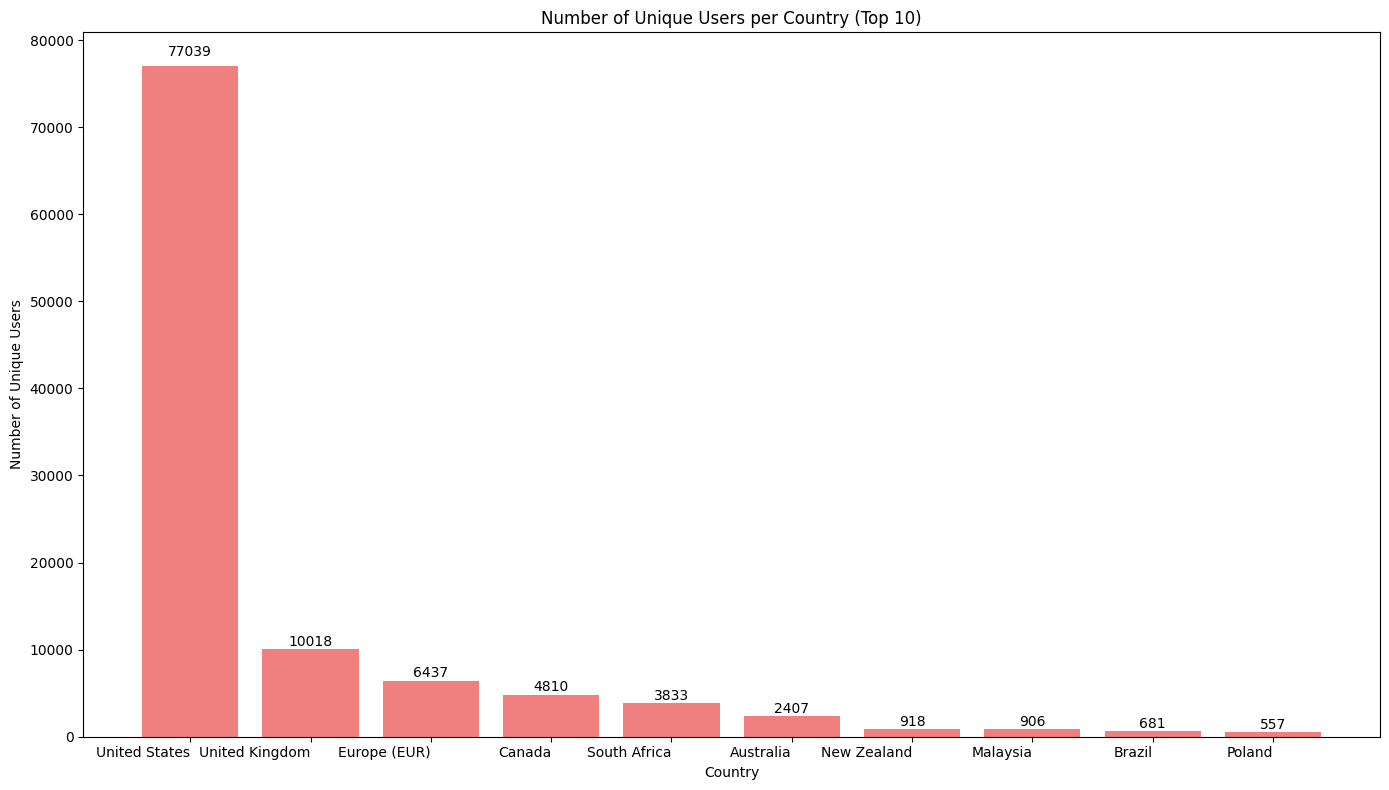

In [70]:
CURRENCY_TO_COUNTRY = {
    '$': 'United States',
    'USD': 'United States',
    '£': 'United Kingdom', 
    'GBP': 'United Kingdom',
    '€': 'Europe (EUR)',
    'EUR': 'Europe (EUR)',
    'CA$': 'Canada',
    'CAD': 'Canada',
    'R': 'South Africa',
    'ZAR': 'South Africa',
    'AU$': 'Australia',
    'AUD': 'Australia',
    'NZ$': 'New Zealand',
    'NZD': 'New Zealand',
    'RM': 'Malaysia',
    'MYR': 'Malaysia',
    'R$': 'Brazil',
    'BRL': 'Brazil',
    'zł': 'Poland',
    'PLN': 'Poland',
    '¥': 'Japan',
    'JPY': 'Japan',
    '₹': 'India',
    'INR': 'India'
}
df['country'] = df['currency'].map(CURRENCY_TO_COUNTRY)

usersPerCountry = df.groupby('country')['user_id'].nunique().sort_values(ascending=False)

print("\nUnique users per country:")
print(usersPerCountry)

plt.figure(figsize=(14, 8))
top_10_countries = usersPerCountry.head(10)
bars = plt.bar(range(len(top_10_countries)), top_10_countries.values, color='lightcoral')
plt.xlabel('Country')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users per Country (Top 10)')
plt.xticks(range(len(top_10_countries)), top_10_countries.index, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The app does well in english speaking countries with the USA accounting for 77% of the top 10 countries' users

Question 3.2

Average daily unique users: 183.08
Peak daily users: 2375


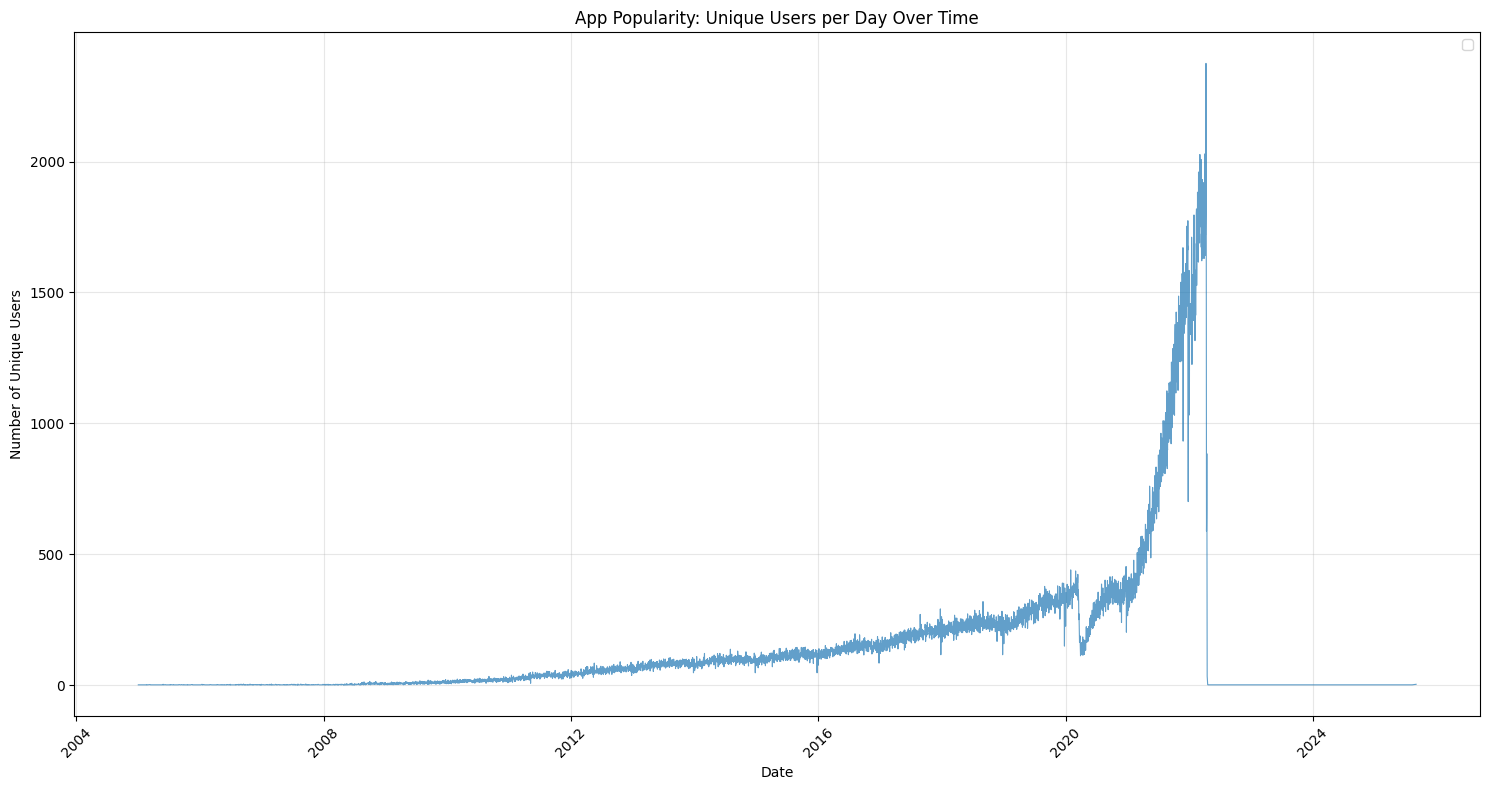

In [71]:
daily_users = df.groupby(df['date_fueled'].dt.date)['user_id'].nunique().reset_index()
daily_users.columns = ['date', 'unique_users']

print(f"Average daily unique users: {daily_users['unique_users'].mean():.2f}")
print(f"Peak daily users: {daily_users['unique_users'].max()}")

# Plot time series
plt.figure(figsize=(15, 8))
plt.plot(daily_users['date'], daily_users['unique_users'], alpha=0.7, linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('App Popularity: Unique Users per Day Over Time')
plt.xticks(rotation=45)

# Add trend line
z = np.polyfit(range(len(daily_users)), daily_users['unique_users'], 1)
p = np.poly1d(z)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The app had steady growth until early 2020 which is to be expected due to the covid pandemic. Since the pandemic the app has seen a sharp and rapid growth.

Question 3.3

Average vehicle age statistics by currency:
                 mean  median   std   count
country                                    
Australia       10.87     9.0  7.54   19645
Canada          10.40     9.0  7.76   40716
Europe (EUR)    11.06    10.0  7.01   52740
Malaysia         7.96     7.0  6.16    7119
New Zealand     14.45    14.0  7.53    6419
South Africa     9.04     8.0  6.22   31486
United Kingdom   9.13     8.0  6.55   72806
United States   11.17    10.0  8.24  678875


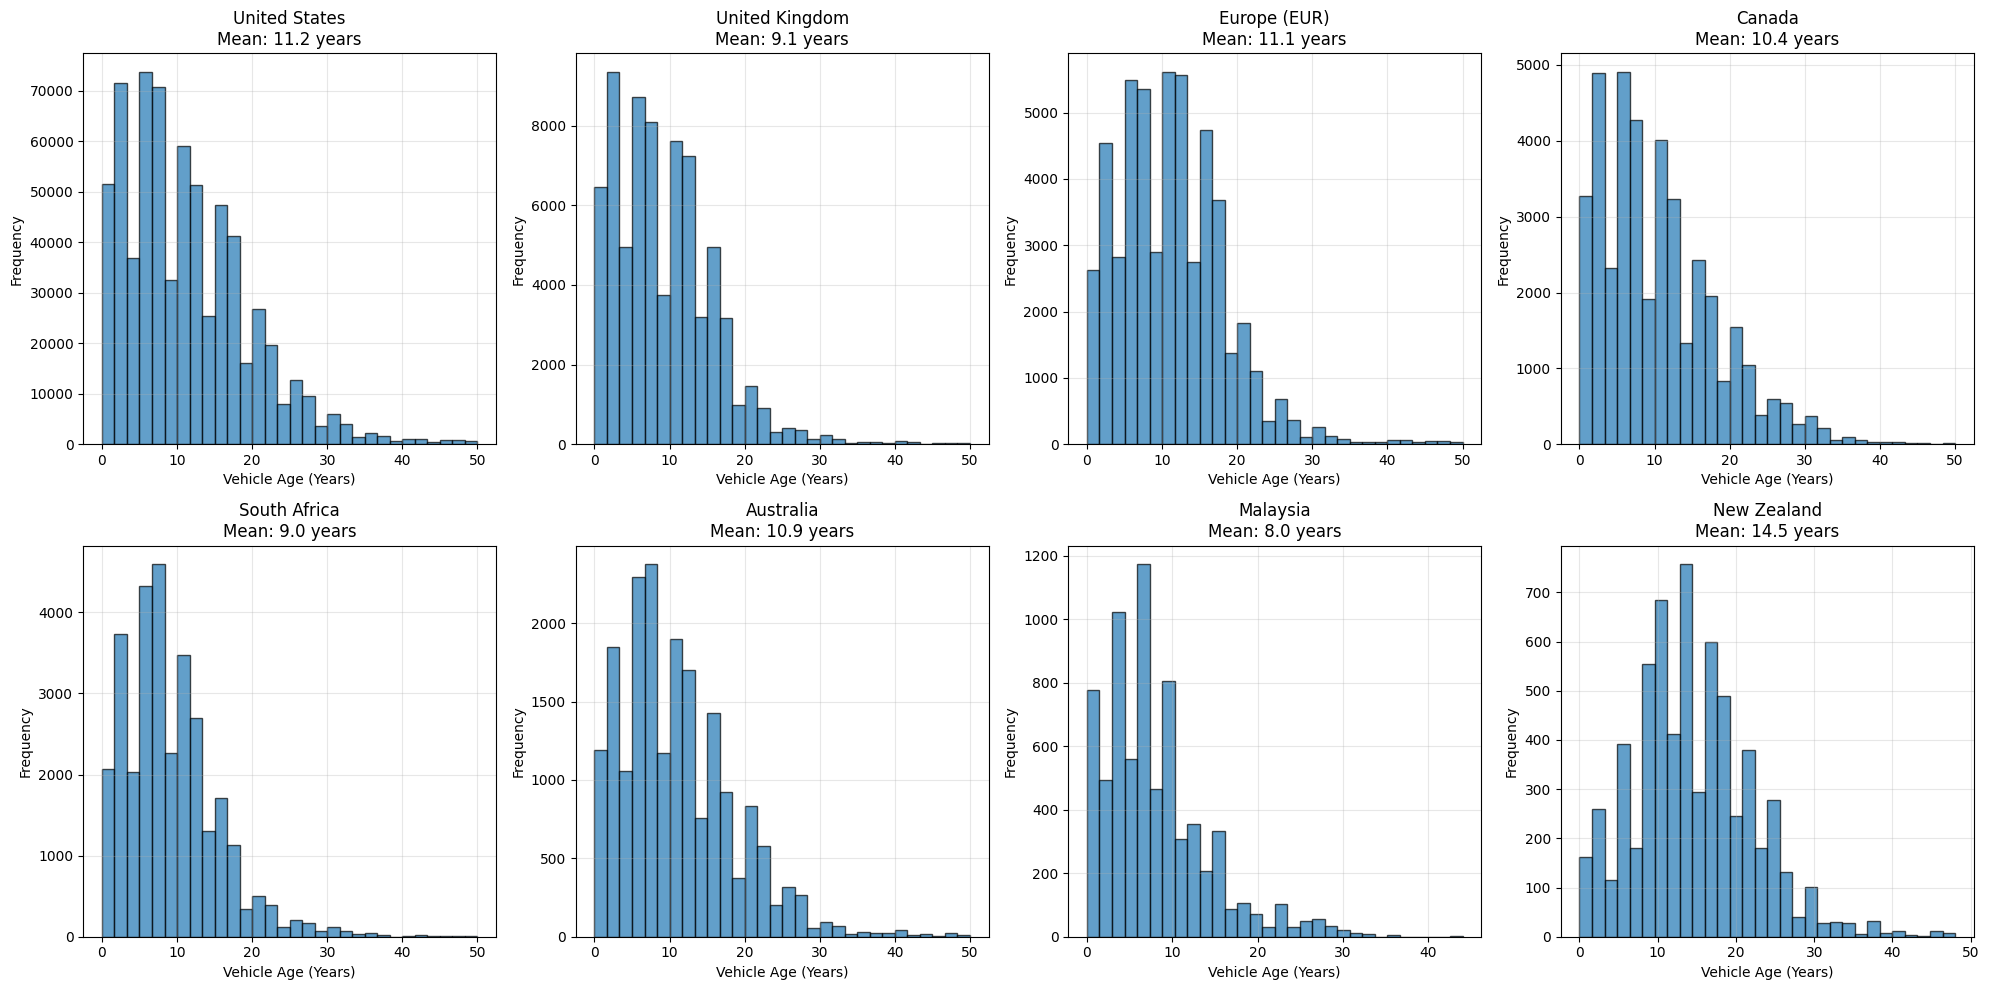

In [72]:
df['vehicle_age_at_refuel'] = df['date_fueled'].dt.year - df['year']

# Filter out unrealistic ages (negative ages or very old vehicles)
df_age_filtered = df[(df['vehicle_age_at_refuel'] >= 0) & (df['vehicle_age_at_refuel'] <= 50)]

# Get top currencies for cleaner visualization
top_currencies = df['country'].value_counts().head(8).index.tolist()
df_top_currencies = df_age_filtered[df_age_filtered['country'].isin(top_currencies)]

# Calculate average vehicle age per currency
avg_age_by_currency = df_top_currencies.groupby('country')['vehicle_age_at_refuel'].agg([
    'mean', 'median', 'std', 'count'
]).round(2)

print("Average vehicle age statistics by currency:")
print(avg_age_by_currency)

# Histogram of vehicle ages for top currencies
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, currency in enumerate(top_currencies):
    currency_data = df_top_currencies[df_top_currencies['country'] == currency]['vehicle_age_at_refuel']
    
    axes[i].hist(currency_data, bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{currency}\nMean: {currency_data.mean():.1f} years')
    axes[i].set_xlabel('Vehicle Age (Years)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Most have an age around 10 years. New Zealand have slighlty older cars while Malaysia have slighlty younger cars

Question 3.4

Top 15 most popular car makes:
make
Ford             121483
Toyota           120095
Bmw               92430
Nissan            75828
Volkswagen        65159
Honda             58193
Mercedes Benz     54779
Audi              50789
Hyundai           45718
Mazda             41128
Lexus             35716
Kia               34518
Volvo             31546
Subaru            31003
Jeep              29937
Name: count, dtype: int64

Top 15 most popular car models:
model
Civic           7223
Corolla         6964
4Runner         6935
Accord          6899
F 150           6842
Ranger          6728
Mustang         6634
Camry           6589
Wrangler        6295
Land_Cruiser    6283
Jetta           6101
Golf            5886
Legacy          5706
Explorer        5640
Tacoma          5541
Name: count, dtype: int64


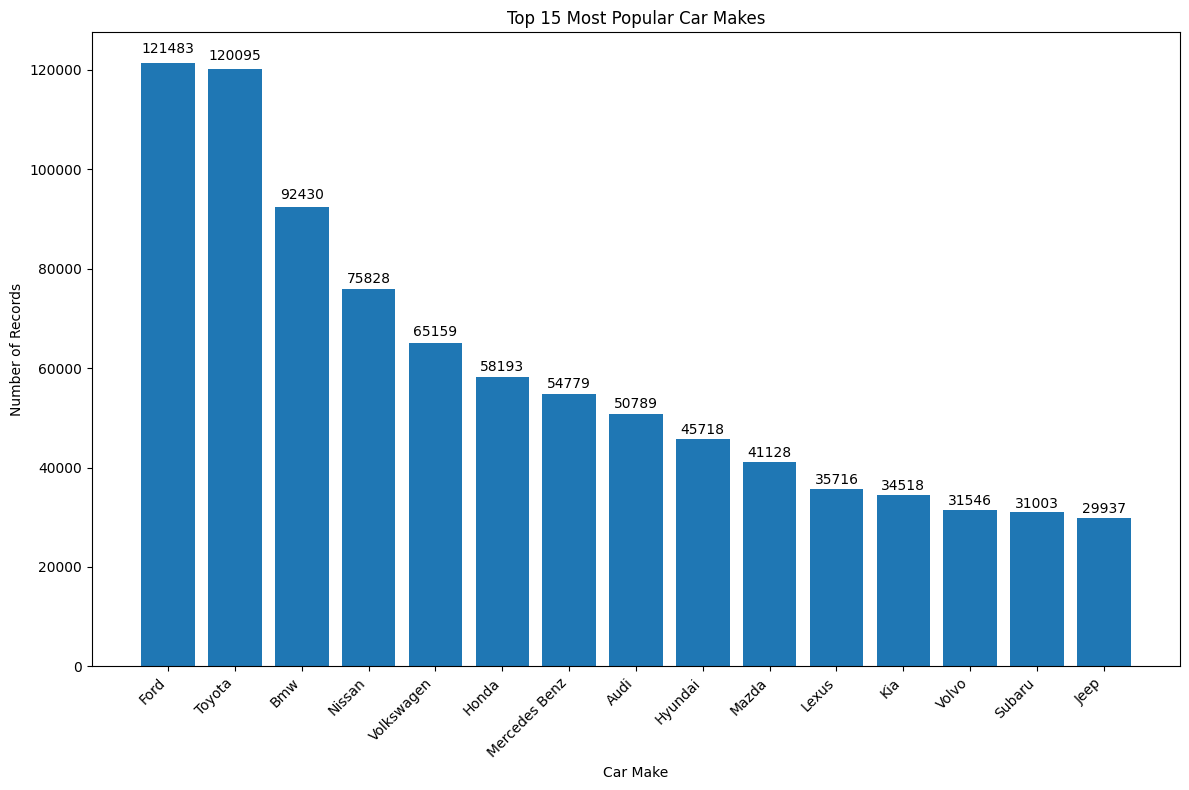

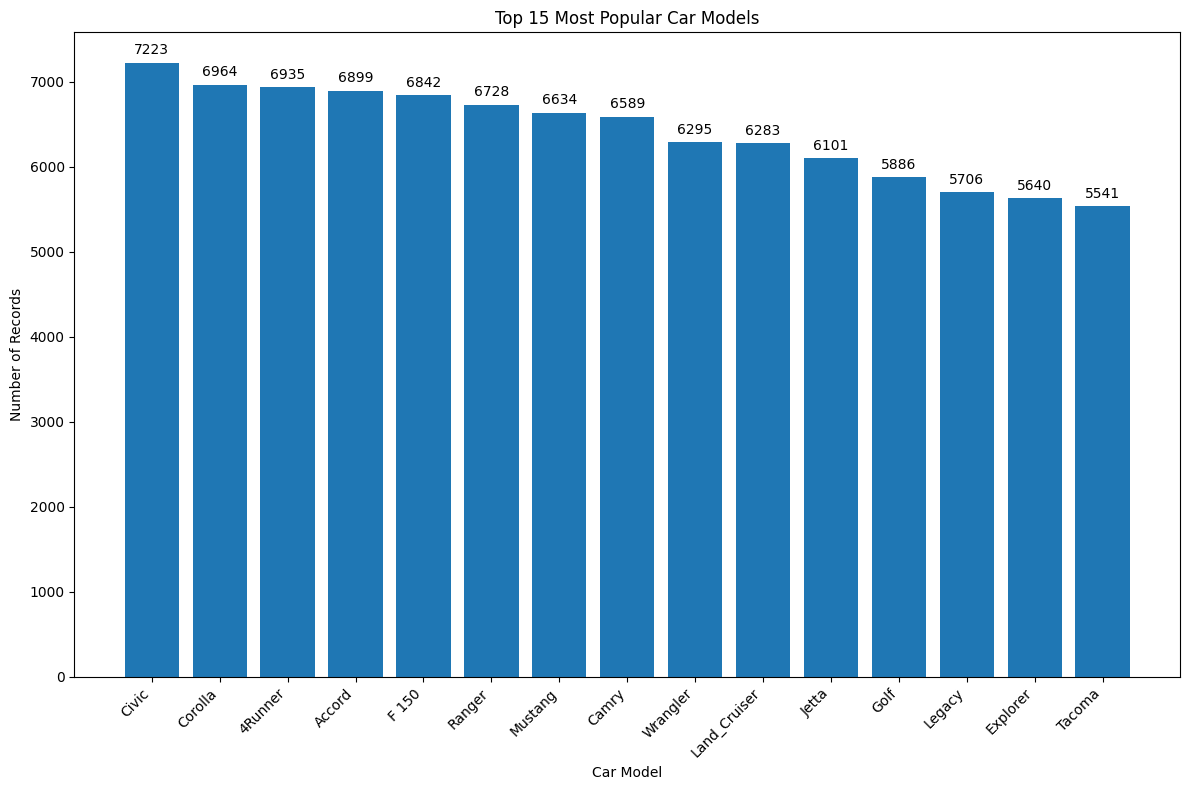


Top 15 most popular make-model combinations:
make_model
Honda Civic            7223
Toyota Corolla         6964
Toyota 4Runner         6935
Honda Accord           6899
Ford F 150             6842
Ford Ranger            6728
Ford Mustang           6634
Toyota Camry           6589
Jeep Wrangler          6295
Toyota Land_Cruiser    6283
Volkswagen Jetta       6101
Volkswagen Golf        5886
Subaru Legacy          5706
Ford Explorer          5640
Toyota Tacoma          5541
Name: count, dtype: int64


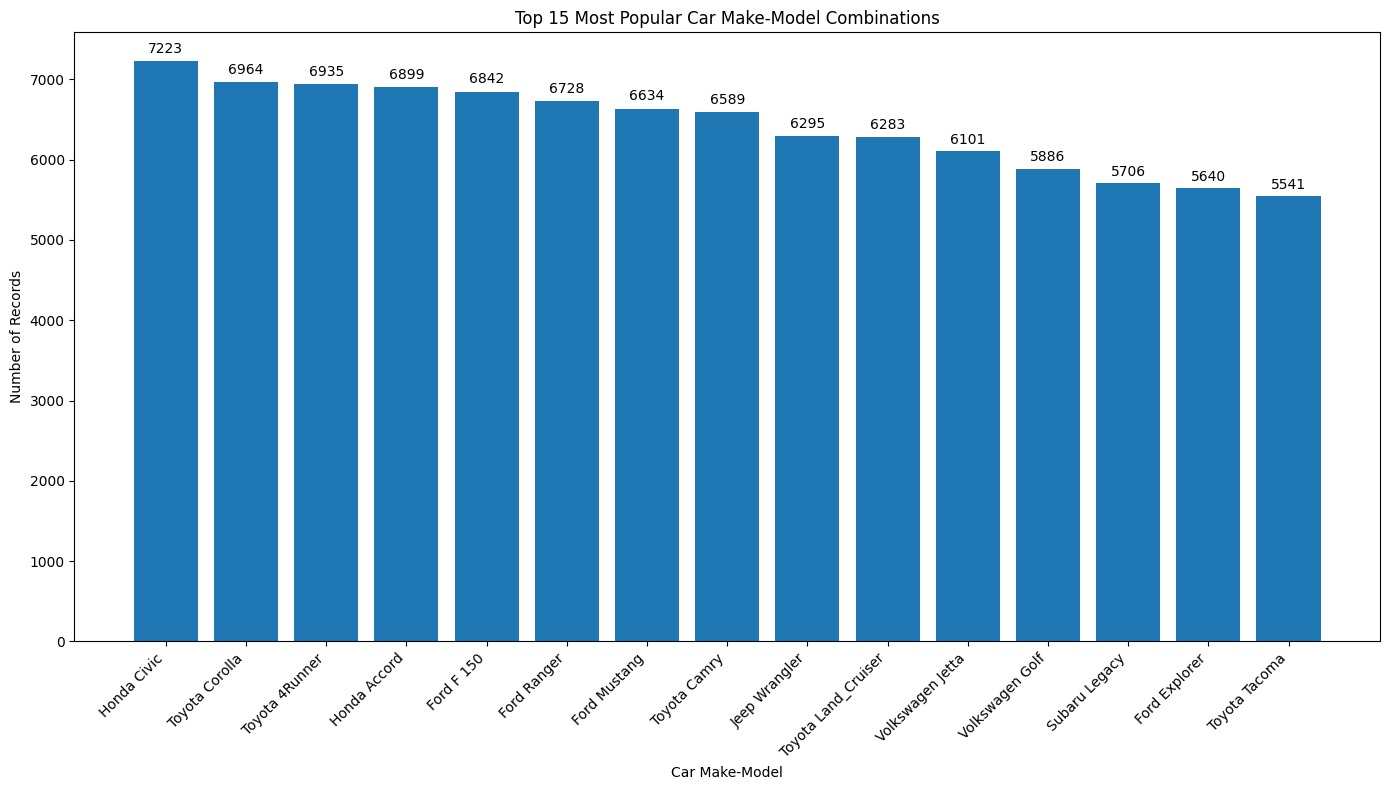

In [73]:
make_counts = df['make'].value_counts().head(15)
print("Top 15 most popular car makes:")
print(make_counts)

# Most popular models
model_counts = df['model'].value_counts().head(15)
print("\nTop 15 most popular car models:")
print(model_counts)

# Plot most popular makes
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(make_counts)), make_counts.values)
plt.xlabel('Car Make')
plt.ylabel('Number of Records')
plt.title('Top 15 Most Popular Car Makes')
plt.xticks(range(len(make_counts)), make_counts.index, rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot most popular models
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(model_counts)), model_counts.values)
plt.xlabel('Car Model')
plt.ylabel('Number of Records')
plt.title('Top 15 Most Popular Car Models')
plt.xticks(range(len(model_counts)), model_counts.index, rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Make-Model combinations
df['make_model'] = df['make'] + ' ' + df['model']
make_model_counts = df['make_model'].value_counts().head(15)
print("\nTop 15 most popular make-model combinations:")
print(make_model_counts)

# Plot make-model combinations
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(make_model_counts)), make_model_counts.values)
plt.xlabel('Car Make-Model')
plt.ylabel('Number of Records')
plt.title('Top 15 Most Popular Car Make-Model Combinations')
plt.xticks(range(len(make_model_counts)), make_model_counts.index, rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ford and Toyota are by far the most popular models. Honda being the sixth most popular model, have the most popular make and model. Ford and Toyota have many make and models in the top 10 which is to be expected.

Question 4.1 -1 Identify the top 5 currencies by number of transactions.

In [81]:
#Top_5 = df['currency'].value_counts().head(5)
#print(Top_5)
top5_after = df['currency'].dropna().value_counts().head(5).index.tolist()
print("Top 5:", top5_after)

Top 5: ['$', '€', '£', 'CA$', 'AU$']


Question 4.1 - 2 For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc.

In [82]:
df['cost_per_litre'] = df['total_spent_float'] / df['litres']
print(df['cost_per_litre'].value_counts().head(5))

cost_per_litre
0.000000    651
0.713015    214
0.792517    182
1.056689    179
0.845081    165
Name: count, dtype: int64


<Figure size 400x400 with 0 Axes>

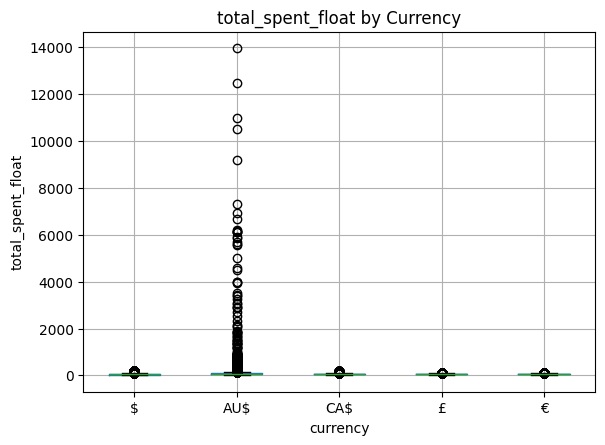

<Figure size 400x400 with 0 Axes>

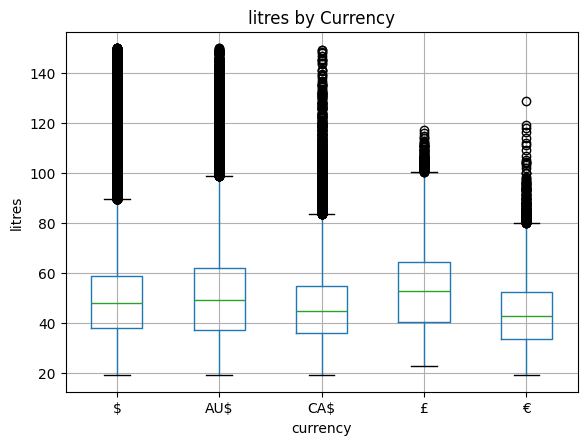

<Figure size 400x400 with 0 Axes>

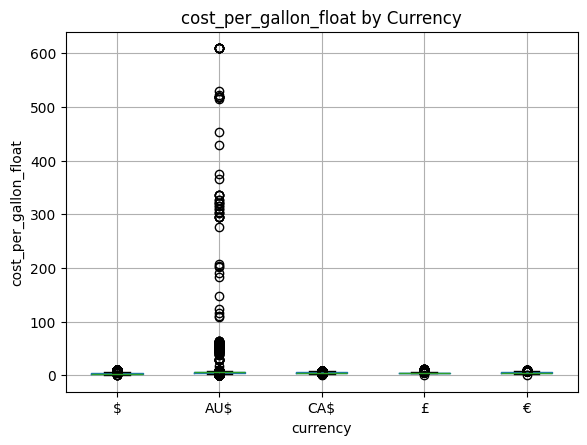

<Figure size 400x400 with 0 Axes>

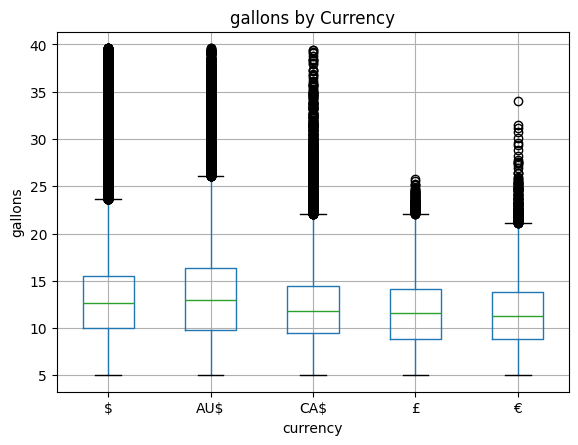

<Figure size 400x400 with 0 Axes>

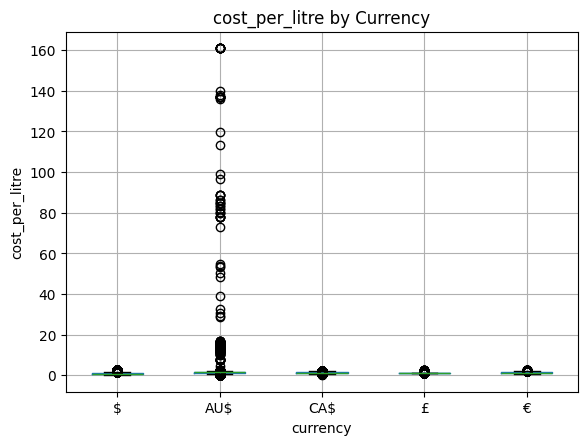

In [83]:
for col in ["total_spent_float", "litres", "cost_per_gallon_float", "gallons", "cost_per_litre"]:
    plt.figure(figsize=(4,4))
    df[df['currency'].isin(top5_after)].boxplot(column=col, by='currency')
    plt.title(f"{col} by Currency")
    plt.suptitle("")
    plt.ylabel(col)
    plt.show()

For the total spend:
For total spend, the US Dollar transactions dominate the dataset, with most fills between $20–$150. A small number of extreme points above $200 were flagged as outliers, as such totals are unrealistic for passenger vehicles. South African Rand and Canadian Dollar transactions displayed values much lower than expected (often <R300 or <$30), suggesting mislabelling or partial entries. British Pound and Euro totals clustered around £30–40 and €30–40, slightly below typical full tank values, but were retained as plausible. Overall, we flagged the extreme high spenders in USD and noted systemic underreporting in ZAR and CAD records.
keep $10–$200 (most cars fill between $30–$100).
keep R200–R2000 (real-world full tank ~R800–R1500).
keep CA$10–$200.
keep £20–£120.
keep €20–€120.

In [87]:
overall_spend = {
    '$':  (10, 200),
    'R':  (200, 2000),
    'CA$': (10, 200),
    '£':  (20, 120),
    '€':  (20, 120),
}

def spend_outlier(x):
    cur = x['currency'].iat[0]
    if cur in overall_spend:
        low, high = overall_spend[cur]
        return x[x['total_spent_float'].between(low, high)]
    return x

df = df.groupby('currency', group_keys=False).apply(spend_outlier)

For litres: For litres filled, all five currencies showed unrealistic outliers. In US Dollar records, some transactions exceeded 3000 L per fill, which is physically implausible for passenger vehicles. Similar extreme outliers were observed in GBP and EUR records (up to 2200 L and 1700 L respectively). Even in CAD and ZAR transactions, values above 500 L were present. Based on domain knowledge (typical passenger vehicle fuel tanks range 40–80 L, with rare outliers up to 150 L), we applied cutoffs to remove fills below 5 L (likely data entry errors) and above 150 L (implausible for individual vehicles). This resulted in the removal of approximately a % of records, leaving a dataset more consistent with real-world fueling behaviour.

In [86]:
df = df[(df["litres"]>=5) & (df["litres"]<=150)]

For cost per gallon: Cost per gallon plots were dominated by implausible values (tens of thousands to hundreds of thousands per gallon). This results from division by extremely small gallon entries, mislabelled currencies, or unit confusion. To address this, we recalculated cost per litre from the cleaned total_spent_float and litres fields, then applied domain-based thresholds per currency (e.g., $0.5–2.0 per litre for USD, R20–30 for ZAR). Values outside these realistic ranges were removed as outliers. This process removed the systematic noise and left distributions that match known fuel prices.

For cost per litre: Boxplots of cost per litre by currency revealed implausibly high values (e.g. $20,000 per litre, £43,000 per litre). These are caused by division with extremely small litre values or mislabelled currencies. In practice, petrol prices vary within narrow bands (USD 0.3–2.0 per litre, GBP 1–2.5 per litre, ZAR 15–35 per litre). We therefore removed all entries outside these ranges, which eliminated the systematic noise and left distributions matching real-world expectations.

In [88]:
df['cost_per_litre'] = df['total_spent_float'] / df['litres']

# replaces all zeroes and neagtive values or low values with NaN
df.loc[~np.isfinite(df['cost_per_litre']), 'cost_per_litre'] = np.nan
df.loc[df['cost_per_litre'] <= 0, 'cost_per_litre'] = np.nan
df.loc[df['litres'] < 1, 'cost_per_litre'] = np.nan

overall_litres = {
    '$':  (0.3, 2.5),   
    'CA$':(0.4, 2.5),   
    '€':  (0.8, 2.8),   
    '£':  (1.0, 3.0),   
    'R':  (15,  40),    
}

def litre_outlier(x):
    cur = x['currency'].iat[0]
    if cur in overall_litres:
        low, high = overall_litres[cur]
        return x[x['cost_per_litre'].between(low, high) | x['cost_per_litre'].isna()]
    return x

df = df.groupby('currency', group_keys=False).apply(litre_outlier)


For gallons: The gallons distributions showed most values clustered below 200, but with extreme outliers up to 1000 gallons. As typical passenger vehicle tanks are 10–20 gallons, with rare cases up to ~50, we capped gallons to a plausible range (5–50) and removed zeros. This eliminated impossible fills (e.g., 500+ gallons) while retaining realistic refuelling behaviour.

In [89]:
df = df[df['gallons'] > 0]
df = df[(df["gallons"]>=5) & (df["gallons"]<=150)]
print("Remaining rows after gallons filter:", len(df))

Remaining rows after gallons filter: 857000


<Figure size 700x500 with 0 Axes>

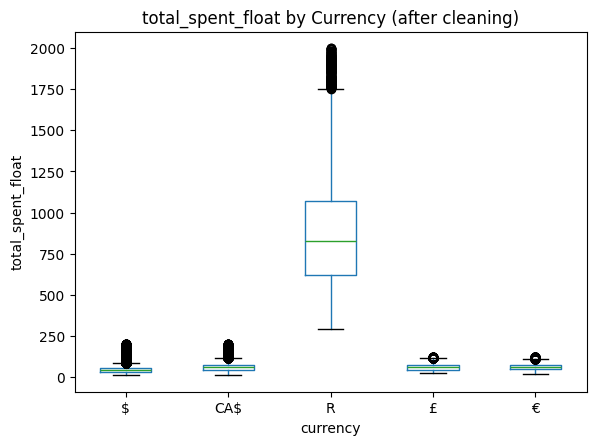

<Figure size 700x500 with 0 Axes>

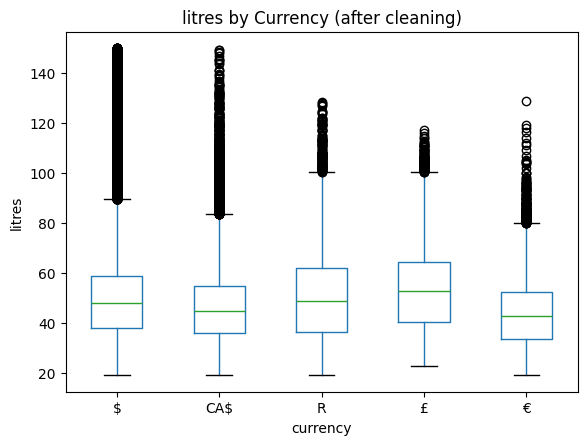

<Figure size 700x500 with 0 Axes>

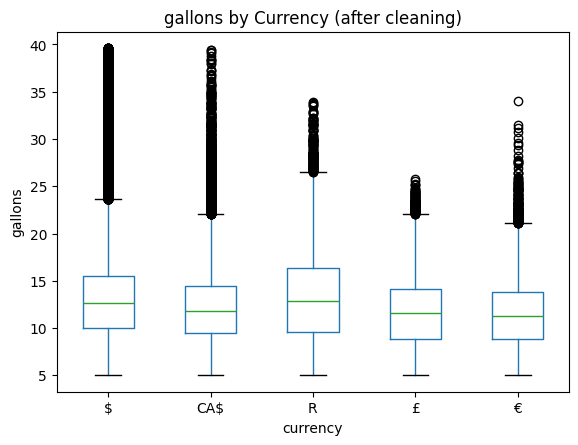

<Figure size 700x500 with 0 Axes>

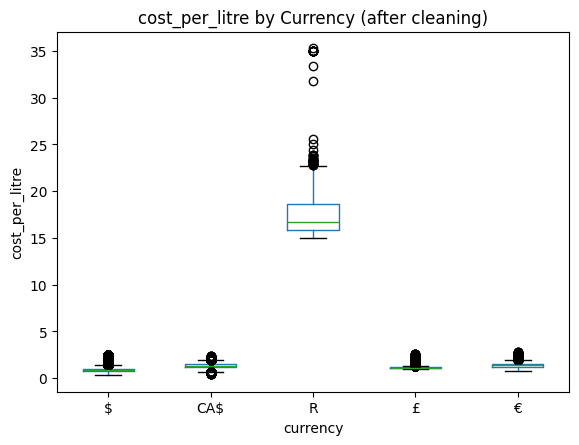

In [ ]:
forced_top5 = ["$", "R", "CA$", "£", "€"]

for col in ["total_spent_float", "litres", "gallons", "cost_per_litre"]:
    plt.figure(figsize=(7,5))  # wider than 4x4, easier to read
    df[df['currency'].isin(forced_top5)].boxplot(column=col, by='currency', grid=False)
    plt.title(f"{col} by Currency (after cleaning)")
    plt.suptitle("")
    plt.ylabel(col)
    plt.show()

Question 4.1 - 3 How many values have been removed after accounting for outliers?

In [ ]:
df_before = pd.read_csv("../Data/logbook_assignment1.csv", low_memory=False)
rows_before = len(df_before)  
rows_after  = len(df)                  
removed     = rows_before - rows_after
percent_removed = (removed / rows_before) * 100

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning:  {rows_after}")
print(f"Removed: {removed} rows ({percent_removed:.2f}%)")

Rows before cleaning: 1174870
Rows after cleaning:  857000
Removed: 317870 rows (27.06%)
